# The plots for the real image reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as mpimg
from skimage.transform import resize

In [2]:
ensembles = ["partial_dft","unitary","gaussian_product_complex_1"]
channel = "noiseless" #can be noiseless
#Loading the image, for each RGB channel we do 5 runs for all alphas. We share the matrix between the different spectral methods.
full_image = mpimg.imread('Data/image_1280_820.jpg')
RGB = full_image.shape[-1] #There are 3 RGB channels
alphas = np.array([[None for x in ensembles] for i in range(RGB)])
original_means = np.array([[None for x in ensembles] for i in range(RGB)])
original_stds = np.array([[None for x in ensembles] for i in range(RGB)])
results = np.array([[None for x in ensembles] for i in range(RGB)])
for RGB_channel in range(RGB):
    for (i_e,ensemble) in enumerate(ensembles):
        filename = "Data/results_real_image_"+ensemble+"_rgb_"+str(RGB_channel)+".pkl"
        infile = open(filename,'rb')
        result = pickle.load(infile)
        infile.close()
        alphas[RGB_channel][i_e] = result['alphas']
        results[RGB_channel][i_e] = result['results']

In [3]:
full_image = mpimg.imread('Data/image_1280_820.jpg')
reduction_factor_unitary = 20
reduction_factor_pgaussians = 10
original_image_unitary = resize(full_image,(full_image.shape[0] // reduction_factor_unitary , full_image.shape[1] // reduction_factor_unitary ), anti_aliasing=True)
original_image_pgaussians = resize(full_image,(full_image.shape[0] // reduction_factor_pgaussians, full_image.shape[1] // reduction_factor_pgaussians), anti_aliasing=True)
mean_unitary, std_unitary = np.mean(original_image_unitary,axis=(0,1)), np.std(original_image_unitary,axis=(0,1))
mean_pgaussians, std_pgaussians = np.mean(original_image_pgaussians,axis=(0,1)), np.std(original_image_pgaussians,axis=(0,1))

## Plot of the MSE evolution, averaged over all the RGB channels

For unitary matrices and product of Gaussians. 

/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([

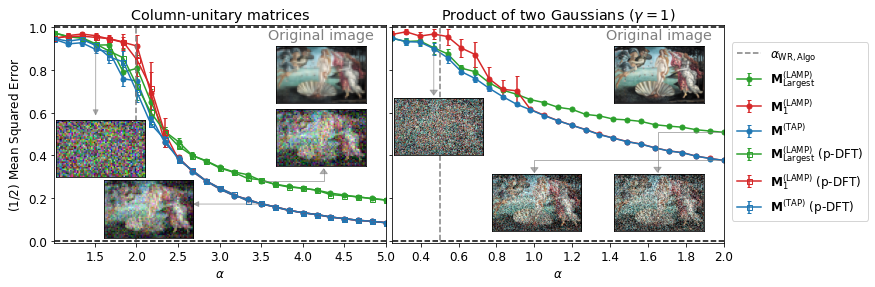

In [4]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1,2,figsize=(12,4),sharey=True)
linewidth = 1.5
markersize = 5
capsize = 2 

ax = axes[0]
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$(1/2)$ Mean Squared Error')
ax.set_title(r'Column-unitary matrices')
alpha_WR = 2.
ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
ax.plot([0.,7],[1.,1.],linestyle='--',color='black',zorder=0)
ax.plot([0.,7],[0.,0.],linestyle='--',color='black',zorder=0)
alphas_plot = alphas[0][0]
NB_CHANNELS = 3

#Unitary (Haar)
#LAMP
qs = np.array([[results[RGB_c][1][a]['q_LAMP'][0]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][1][a]['q_LAMP'][1]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_lamp_largest_haar = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_lamp_largest_haar['mean'], yerr = mses_lamp_largest_haar['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$",color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
qs = np.array([[results[RGB_c][1][a]['q_LAMP'][0]['Closest to 1'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][1][a]['q_LAMP'][1]['Closest to 1'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_lamp_closest_1_haar = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_lamp_closest_1_haar['mean'], yerr = mses_lamp_closest_1_haar['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_1$",color = 'tab:red', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#TAP
qs = np.array([[results[RGB_c][1][a]['q_TAP'][0]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][1][a]['q_TAP'][1]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_tap_haar = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}
eb = ax.errorbar(alphas_plot, mses_tap_haar['mean'], yerr = mses_tap_haar['std'], label = r'$\mathbf{M}^\mathrm{(TAP)}$',color = 'tab:blue', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')

#Partial DFT
#LAMP
qs = np.array([[results[RGB_c][0][a]['q_LAMP'][0]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][0][a]['q_LAMP'][1]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_lamp_largest_partial_dft = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_lamp_largest_partial_dft['mean'], yerr = mses_lamp_largest_partial_dft['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$ (p-DFT)", markerfacecolor='none',marker='s', color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
qs = np.array([[results[RGB_c][0][a]['q_LAMP'][0]['Closest to 1'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][0][a]['q_LAMP'][1]['Closest to 1'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_lamp_closest_1_partial_dft = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_lamp_closest_1_partial_dft['mean'], yerr = mses_lamp_closest_1_partial_dft['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_1$ (p-DFT)",  markerfacecolor='none',marker='s',color = 'tab:red',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#TAP
qs = np.array([[results[RGB_c][0][a]['q_TAP'][0]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][0][a]['q_TAP'][1]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_tap_partial_dft = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_tap_partial_dft['mean'], yerr = mses_tap_partial_dft['std'], label =  r"$\mathbf{M}^\mathrm{(TAP)}$ (p-DFT)",  markerfacecolor='none',marker='s',color = 'tab:blue',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')

#Plots of the images
#alpha = 1.5, TAP
axins = ax.inset_axes([0.005,0.3,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
i_a = 3
alpha_axins = alphas_plot[i_a]
xhat_TAP = np.array([results[RGB_channel][0][i_a]['xhat_TAP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
xhat_TAP = np.transpose(xhat_TAP) #Put the RGB channel in the end of the shape
X0 = (original_image_unitary.reshape(xhat_TAP.shape) - mean_unitary)/std_unitary
phases = np.array([np.dot(np.conjugate(xhat_TAP[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
phases /= np.abs(phases)
xhat_TAP *= phases
image_TAP = xhat_TAP.reshape((820//reduction_factor_unitary,1280//reduction_factor_unitary,3))
#Rescale the image to have the proper range
for RGB_c in range(3):
    image_TAP[:,:,RGB_c] = (np.real(image_TAP)[:,:,RGB_c] - np.mean(np.real(image_TAP)[:,:,RGB_c]))/np.std(np.real(image_TAP)[:,:,RGB_c])
    image_TAP[:,:,RGB_c] = image_TAP[:,:,RGB_c]*np.std(original_image_unitary[:,:,RGB_c]) + np.mean(original_image_unitary[:,:,RGB_c])
axins.imshow(np.real(image_TAP))
x = alpha_axins
y = 1.-results[0][0][i_a]['q_TAP'][0]['Largest']
ax.annotate("",xy=(x,y-0.34), xycoords='data',xytext=(x, y), textcoords='data',arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",alpha = 0.6,color='grey'))

#alpha = 3.5, TAP
axins = ax.inset_axes([0.15,0.02,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
i_a = 15
alpha_axins = alphas_plot[i_a]
xhat_TAP = np.array([results[RGB_channel][0][i_a]['xhat_TAP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
xhat_TAP = np.transpose(xhat_TAP) #Put the RGB channel in the end of the shape
X0 = (original_image_unitary.reshape(xhat_TAP.shape) - mean_unitary)/std_unitary
phases = np.array([np.dot(np.conjugate(xhat_TAP[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
phases /= np.abs(phases)
xhat_TAP *= phases
image_TAP = xhat_TAP.reshape((820//reduction_factor_unitary,1280//reduction_factor_unitary,3))
#Rescale the image to have the proper range
for RGB_c in range(3):
    image_TAP[:,:,RGB_c] = (np.real(image_TAP)[:,:,RGB_c] - np.mean(np.real(image_TAP)[:,:,RGB_c]))/np.std(np.real(image_TAP)[:,:,RGB_c])
    image_TAP[:,:,RGB_c] = image_TAP[:,:,RGB_c]*np.std(original_image_unitary[:,:,RGB_c]) + np.mean(original_image_unitary[:,:,RGB_c])
axins.imshow(np.real(image_TAP))
x = alpha_axins
y = 1.-results[0][0][i_a]['q_TAP'][0]['Largest']
ax.annotate("",xy=(x-0.85,y), xycoords='data',xytext=(x, y), textcoords='data',arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",alpha = 0.6,color='grey'))

#alpha = 3.5, LAMP
axins = ax.inset_axes([0.67,0.35,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
i_a = 15
alpha_axins = alphas_plot[i_a]
xhat_TAP = np.array([results[RGB_channel][0][i_a]['xhat_LAMP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
xhat_TAP = np.transpose(xhat_TAP) #Put the RGB channel in the end of the shape
X0 = (original_image_unitary.reshape(xhat_TAP.shape) - mean_unitary)/std_unitary
phases = np.array([np.dot(np.conjugate(xhat_TAP[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
phases /= np.abs(phases)
xhat_TAP *= phases
image_TAP = xhat_TAP.reshape((820//reduction_factor_unitary,1280//reduction_factor_unitary,3))
#Rescale the image to have the proper range
for RGB_c in range(3):
    image_TAP[:,:,RGB_c] = (np.real(image_TAP)[:,:,RGB_c] - np.mean(np.real(image_TAP)[:,:,RGB_c]))/np.std(np.real(image_TAP)[:,:,RGB_c])
    image_TAP[:,:,RGB_c] = image_TAP[:,:,RGB_c]*np.std(original_image_unitary[:,:,RGB_c]) + np.mean(original_image_unitary[:,:,RGB_c])
axins.imshow(np.real(image_TAP))
x = alpha_axins
y = 1.-results[0][0][i_a]['q_LAMP'][0]['Largest']
ax.annotate("",xy=(x+0.75,y+0.07), xycoords='data',xytext=(x, y), textcoords='data',arrowprops=dict(arrowstyle="-|>,head_width=0.3",connectionstyle="angle,angleA=0,angleB=-90,rad=0",alpha = 0.6,color='grey'))

#The original image
axins = ax.inset_axes([0.67,0.64,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
axins.imshow(original_image_unitary)
axins.set_title(r'Original image',color='grey')

ax.set_xlim(np.min(alphas_plot),np.max(alphas_plot))
ax.set_ylim(-0.01,1.01)
ax.legend(loc='upper center', bbox_to_anchor=(2.25, 0.95),ncol=1,fancybox=True)

#Product of Gaussians
ax = axes[1]
ax.set_xlabel(r'$\alpha$')
ax.set_title(r'Product of two Gaussians ($\gamma = 1$)')
alpha_WR = 0.5
ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
ax.plot([0.,7],[1.,1.],linestyle='--',color='black',zorder=0)
ax.plot([0.,7],[0.,0.],linestyle='--',color='black',zorder=0)
alphas_plot = alphas[0][2]

#LAMP
qs = np.array([[results[RGB_c][2][a]['q_LAMP'][0]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][2][a]['q_LAMP'][1]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_lamp_largest = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_lamp_largest['mean'], yerr = mses_lamp_largest['std'],color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
qs = np.array([[results[RGB_c][2][a]['q_LAMP'][0]['Closest to 1'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][2][a]['q_LAMP'][1]['Closest to 1'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_lamp_closest_1 = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_lamp_closest_1['mean'], yerr = mses_lamp_closest_1['std'],color = 'tab:red', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#TAP
qs = np.array([[results[RGB_c][2][a]['q_TAP'][0]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)]) 
stds = np.array([[results[RGB_c][2][a]['q_TAP'][1]['Largest'] for a in range(len(alphas_plot))] for RGB_c in range(NB_CHANNELS)])
mses_tap = {'mean':np.mean(1.-qs,axis = 0),'std':(1./NB_CHANNELS)*np.sqrt(np.sum(stds**2,axis=0))}  #Mean over the 3 RGB channels
eb = ax.errorbar(alphas_plot, mses_tap['mean'], yerr = mses_tap['std'],color = 'tab:blue', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')

#Plots of the images
#alpha = 0.5, TAP
axins = ax.inset_axes([0.005,0.4,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
i_a = 3
alpha_axins = alphas_plot[i_a]
xhat_TAP = np.array([results[RGB_channel][2][i_a]['xhat_TAP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
xhat_TAP = np.transpose(xhat_TAP) #Put the RGB channel in the end of the shape
X0 = (original_image_pgaussians.reshape(xhat_TAP.shape) - mean_pgaussians)/std_pgaussians
phases = np.array([np.dot(np.conjugate(xhat_TAP[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
phases /= np.abs(phases)
xhat_TAP *= phases
image_TAP = xhat_TAP.reshape((820//reduction_factor_pgaussians,1280//reduction_factor_pgaussians,3))
#Rescale the image to have the proper range
for RGB_c in range(3):
    image_TAP[:,:,RGB_c] = (np.real(image_TAP)[:,:,RGB_c] - np.mean(np.real(image_TAP)[:,:,RGB_c]))/np.std(np.real(image_TAP)[:,:,RGB_c])
    image_TAP[:,:,RGB_c] = image_TAP[:,:,RGB_c]*np.std(original_image_pgaussians[:,:,RGB_c]) + np.mean(original_image_pgaussians[:,:,RGB_c])
axins.imshow(np.real(image_TAP))
x = alpha_axins
y = 1.-results[0][2][i_a]['q_TAP'][0]['Largest']
ax.annotate("",xy=(x,y-0.23), xycoords='data',xytext=(x, y), textcoords='data',arrowprops=dict(arrowstyle="-|>,head_width=0.3",connectionstyle="arc3",alpha = 0.6,color='grey'))

#alpha = 2.0, TAP
axins = ax.inset_axes([0.3,0.05,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
i_a = 24
alpha_axins = alphas_plot[i_a]
xhat_TAP = np.array([results[RGB_channel][2][i_a]['xhat_TAP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
xhat_TAP = np.transpose(xhat_TAP) #Put the RGB channel in the end of the shape
X0 = (original_image_pgaussians.reshape(xhat_TAP.shape) - mean_pgaussians)/std_pgaussians
phases = np.array([np.dot(np.conjugate(xhat_TAP[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
phases /= np.abs(phases)
xhat_TAP *= phases
image_TAP = xhat_TAP.reshape((820//reduction_factor_pgaussians,1280//reduction_factor_pgaussians,3))
#Rescale the image to have the proper range
for RGB_c in range(3):
    image_TAP[:,:,RGB_c] = (np.real(image_TAP)[:,:,RGB_c] - np.mean(np.real(image_TAP)[:,:,RGB_c]))/np.std(np.real(image_TAP)[:,:,RGB_c])
    image_TAP[:,:,RGB_c] = image_TAP[:,:,RGB_c]*np.std(original_image_pgaussians[:,:,RGB_c]) + np.mean(original_image_pgaussians[:,:,RGB_c])
axins.imshow(np.real(image_TAP))
x = alpha_axins
y = 1.-results[0][2][i_a]['q_TAP'][0]['Largest']
ax.annotate("",xy=(x-1.0,y-0.07), xycoords='data',xytext=(x, y), textcoords='data',arrowprops=dict(arrowstyle="-|>,head_width=0.3",connectionstyle="angle,angleA=180,angleB=90,rad=0",alpha = 0.6,color='grey'))

#alpha = 2.0, LAMP
axins = ax.inset_axes([0.67,0.05,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
i_a = 24
alpha_axins = alphas_plot[i_a]
xhat_TAP = np.array([results[RGB_channel][2][i_a]['xhat_LAMP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
xhat_TAP = np.transpose(xhat_TAP) #Put the RGB channel in the end of the shape
X0 = (original_image_pgaussians.reshape(xhat_TAP.shape) - mean_pgaussians)/std_pgaussians
phases = np.array([np.dot(np.conjugate(xhat_TAP[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
phases /= np.abs(phases)
xhat_TAP *= phases
image_TAP = xhat_TAP.reshape((820//reduction_factor_pgaussians,1280//reduction_factor_pgaussians,3))
#Rescale the image to have the proper range
for RGB_c in range(3):
    image_TAP[:,:,RGB_c] = (np.real(image_TAP)[:,:,RGB_c] - np.mean(np.real(image_TAP)[:,:,RGB_c]))/np.std(np.real(image_TAP)[:,:,RGB_c])
    image_TAP[:,:,RGB_c] = image_TAP[:,:,RGB_c]*np.std(original_image_pgaussians[:,:,RGB_c]) + np.mean(original_image_pgaussians[:,:,RGB_c])
axins.imshow(np.real(image_TAP))
x = alpha_axins
y = 1.-results[0][2][i_a]['q_LAMP'][0]['Largest']
ax.annotate("",xy=(x-0.35,y-0.2), xycoords='data',xytext=(x, y), textcoords='data',arrowprops=dict(arrowstyle="-|>,head_width=0.3",connectionstyle="angle,angleA=180,angleB=90,rad=0",alpha = 0.6,color='grey'))

#The original image
axins = ax.inset_axes([0.67,0.64,0.27, 0.27])
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
axins.imshow(original_image_pgaussians)
axins.set_title(r'Original image',color='grey')

ax.set_xlim(np.min(alphas_plot),np.max(alphas_plot))
ax.set_ylim(-0.01,1.01)

plt.subplots_adjust(wspace=0.02)
#plt.savefig('figures/mse_spectral_real_image.png',bbox_inches = 'tight',dpi=200)

## Plots of the spectra of LAMP and TAP at different points

### For Product of Gaussians

In [5]:
#Spectrums : RGB = 0
spectrums = np.array([None for a in range(len(alphas[0][2]))])
for a in [3,10,20,24]:
    spectrums[a] = results[0][2][a]['spectrums']
alphas_plot = alphas[0][2]

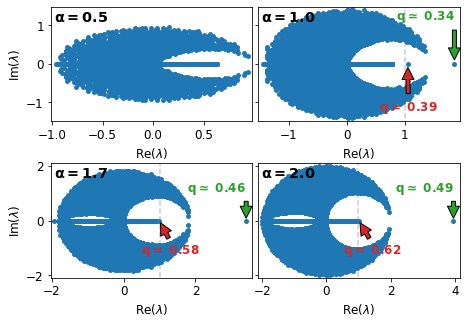

In [7]:
#THE LAMP plots
instance_list_LAMP = [0,0,2,1] #The list of the index (from 0 to 4) of the picked instances for the plots
plt.rcParams.update({'font.size': 12})
golden = (1+np.sqrt(5.))/2
width = 4
fig, axes = plt.subplots(2,2,figsize=(10/1.5,7/1.5),sharey='row')
counter_axes = 0
for (i_a,alpha) in enumerate(alphas_plot):
    if i_a in [3,10,20,24]:
        #Plot of the LAMP spectrum
        ax = axes[counter_axes // 2][counter_axes % 2 ]
        ax.locator_params(axis='y', nbins=3)
        ax.locator_params(axis='x', nbins=4)
        evalues_re = np.array([x.real for x in spectrums[i_a]['LAMP'][instance_list_LAMP[counter_axes]]])
        evalues_im = np.array([x.imag for x in spectrums[i_a]['LAMP'][instance_list_LAMP[counter_axes]]])
        ax.set_xlim(min(evalues_re)*1.05, max(evalues_re)*1.05)
        ax.set_ylim(min(evalues_im)*1.05, max(evalues_im)*1.05)
        ax.plot([1,1],[-100, 100],linestyle='--',color='grey',zorder=0,alpha=0.4,linewidth=1.5)
        ax.scatter(evalues_re,evalues_im,s=15,zorder=1)
        ax.set_xlabel(r"$\mathrm{Re}(\lambda)$")
        if counter_axes % 2 == 0:
            ax.set_ylabel(r"$\mathrm{Im}(\lambda)$")

        ax.set_title(r'$\mathbf{\alpha = }$'+str(round(alpha,1)),x = 0.15,y = 0.82,fontweight='bold')
        counter_axes += 1
        if alpha > 0.5:
            #FInd the largest and closest to one
            largest_i = np.where(evalues_re == max(evalues_re))
            largest_re = evalues_re[largest_i]
            largest_im = evalues_im[largest_i]
            modulus_one = np.abs(evalues_re-1.)**2 + np.abs(evalues_im)**2
            closest_to_one_i = np.where(modulus_one == min(modulus_one))
            closest_to_one_re = evalues_re[closest_to_one_i]
            closest_to_one_im = evalues_im[closest_to_one_i]
            x = largest_re - 0.
            ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(results[0][2][i_a]['q_LAMP'][0]['Largest'],2)), xy=(largest_re, largest_im), xytext=(x, largest_im+1.45),arrowprops=dict(facecolor='tab:green', shrink=0.1),zorder=2,color='tab:green', fontweight='bold',horizontalalignment='right', verticalalignment='top')  
            ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(results[0][2][i_a]['q_LAMP'][0]['Closest to 1'],2)), xy=(closest_to_one_re, closest_to_one_im), xytext=(closest_to_one_re-0.5, closest_to_one_im-1.2),arrowprops=dict(facecolor='tab:red', shrink=0.1),zorder=2,color='tab:red', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(wspace=0.03,hspace = 0.37)
#plt.savefig("figures/spectrums_lamp_real_image_pgaussians.png", bbox_inches='tight',dpi=200)

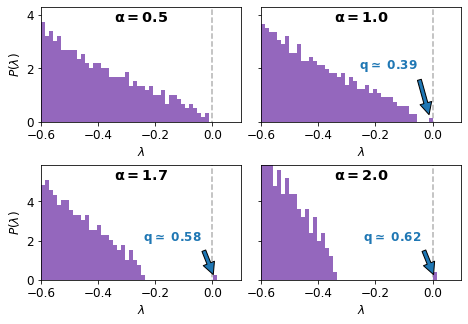

In [8]:
#Plot of TAP spectrum
instance_list_TAP = [0,1,2,0] #The list of the index (0 or 1) of the picked instances for the plots
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2,2,figsize=(10/1.5,7/1.5),sharey='row')
counter_axes = 0
for (i_a,alpha) in enumerate(alphas_plot):
    if i_a in [3,10,20,24]:
        #Plot of the TAP spectrum
        ax = axes[counter_axes // 2][counter_axes % 2 ]
        evalues = np.array(spectrums[i_a]['TAP'][instance_list_TAP[counter_axes]]) -1.
        ax.set_xlim(0.4 -1.,1.1 -1.)
        ax.hist(evalues,range=[0.4 -1.,1.1 -1.],bins=50,density= True,zorder=1,color='tab:purple')
        if counter_axes % 2 == 0:
            ax.set_ylabel(r"$P(\lambda)$")
        ax.set_xlabel(r"$\lambda$")

        ax.set_title(r'$\mathbf{\alpha = }$'+str(round(alpha,1)),x = 0.5,y = 0.82,fontweight='bold')
        counter_axes += 1
        #FInd the largest
        if alpha > 0.5:
            largest_i = np.where(evalues == max(evalues))
            largest = evalues[largest_i]
            ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(results[0][2][i_a]['q_TAP'][0]['Largest'],2)), xy=(largest, 0.1), xytext=(largest-0.25, 2.0),arrowprops=dict(facecolor='tab:blue', shrink=0.1),zorder=2,color='tab:blue', fontweight='bold')
        #Turn autoscaling off
        min_y, max_y = ax.get_ylim()
        ax.plot([0.,0.],[-100,100],linestyle='--',color='grey',zorder=0,alpha=0.6,linewidth=1.5)
        ax.set_ylim(min_y, max_y*1.05)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1,hspace = 0.37)
#plt.savefig("figures/spectrums_TAP_real_image_pgaussians.png", bbox_inches='tight',dpi=200)

# With the gradient descent procedure

## Plot of the reconstructed images

In [9]:
reduction_factor = 10
full_image = mpimg.imread('Data/image_1280_820.jpg')
RGB = 3 #3 channels
ensemble = "partial_dft"
channel = "noiseless" 
alphas = np.array([None for i in range(RGB)])
results = np.array([None for i in range(RGB)])
for RGB_channel in range(RGB):
    filename = "Data/results_real_image_"+ensemble+"_rgb_"+str(RGB_channel)+"_with_GD.pkl"
    infile = open(filename,'rb')
    result = pickle.load(infile)
    infile.close()
    alphas[RGB_channel] = result['alphas']
    results[RGB_channel] = result['results']

In [10]:
image_original = resize(full_image,(full_image.shape[0] // reduction_factor , full_image.shape[1] // reduction_factor), anti_aliasing=True)
mean, std = np.mean(image_original,axis=(0,1)), np.std(image_original,axis=(0,1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


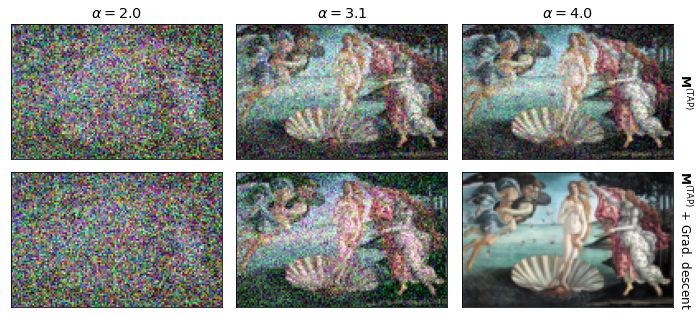

In [11]:
# A plot with reconstructed images with TAP and TAP + GD for column-unitary matrices, for alpha = 2,3,4
alphas_plot = alphas[0] #All the RGB channels share the same alpha
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2,3,figsize=(10,4.5))
linewidth = 1.5
markersize = 5
capsize = 2 
for (i_a,alpha) in enumerate(alphas_plot):
    #TAP
    ax = axes[0][i_a]
    xhat = np.array([results[RGB_channel][i_a]['xhat_TAP']['Largest'][0] for RGB_channel in range(3)]) #We always take instance 0
    xhat = np.transpose(xhat) #Put the RGB channel in the end of the shape
    X0 = (image_original.reshape(xhat.shape) - mean)/std
    phases = np.array([np.dot(np.conjugate(xhat[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
    phases /= np.abs(phases)
    xhat *= phases
    image = xhat.reshape((820//reduction_factor,1280//reduction_factor,3))
    #Rescale the image to have the proper range
    for RGB_c in range(3):
        image[:,:,RGB_c] = (np.real(image)[:,:,RGB_c] - np.mean(np.real(image)[:,:,RGB_c]))/np.std(np.real(image)[:,:,RGB_c])
        image[:,:,RGB_c] = image[:,:,RGB_c]*np.std(image_original[:,:,RGB_c]) + np.mean(image_original[:,:,RGB_c])
    ax.imshow(np.real(image))
    ax.get_xaxis().set_visible(False)
    ax.set_title(r'$\alpha = $'+str(round(alpha,1)),x = 0.5)

    #TAP + GD
    ax = axes[1][i_a]
    xhat = np.array([results[RGB_channel][i_a]['xhat_TAP_GD'][0] for RGB_channel in range(3)]) #We always take instance 0
    xhat = np.transpose(xhat) #Put the RGB channel in the end of the shape
    X0 = (image_original.reshape(xhat.shape) - mean)/std
    phases = np.array([np.dot(np.conjugate(xhat[:,RGB_channel]),X0[:,RGB_channel]) for RGB_channel in range(3)])
    phases /= np.abs(phases)
    xhat *= phases
    image = xhat.reshape((820//reduction_factor,1280//reduction_factor,3))
    #Rescale the image to have the proper range
    for RGB_c in range(3):
        image[:,:,RGB_c] = (np.real(image)[:,:,RGB_c] - np.mean(np.real(image)[:,:,RGB_c]))/np.std(np.real(image)[:,:,RGB_c])
        image[:,:,RGB_c] = image[:,:,RGB_c]*np.std(image_original[:,:,RGB_c]) + np.mean(image_original[:,:,RGB_c])
    ax.imshow(np.real(image))
    ax.get_xaxis().set_visible(False)

    if i_a == 2:
        ax = axes[0][i_a]
        ax.set_yticks([])
        ax.yaxis.set_ticks_position('none') 
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(r'$\mathbf{M}^\mathrm{(TAP)}$',rotation=-90,labelpad=20)
        ax = axes[1][i_a]
        ax.set_yticks([])
        ax.yaxis.set_ticks_position('none') 
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(r'$\mathbf{M}^\mathrm{(TAP)}$ + Grad. descent',rotation=-90,labelpad=20)
    else:
        axes[0][i_a].get_yaxis().set_visible(False)
        axes[1][i_a].get_yaxis().set_visible(False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.03,hspace = 0.1)
#plt.savefig('figures/comparison_TAP_with_GD_unitary.png',bbox_inches = 'tight',dpi=200)

## The MSE

In [12]:
#The more_averages
ensembles_more_averages = ["partial_dft","gaussian_product_complex_1"]
channel_more_averages = "noiseless" 
alphas_more_averages = np.array([[None for x in ensembles_more_averages] for i in range(RGB)])
original_means_more_averages = np.array([[None for x in ensembles_more_averages] for i in range(RGB)])
original_stds_more_averages = np.array([[None for x in ensembles_more_averages] for i in range(RGB)])
results_more_averages = np.array([[None for x in ensembles_more_averages] for i in range(RGB)])
for RGB_channel in range(RGB):
    for (i_e,ensemble) in enumerate(ensembles_more_averages):
        filename = "Data/results_real_image_"+ensemble+"_rgb_"+str(RGB_channel)+"_with_GD_more_averages.pkl"
        infile = open(filename,'rb')
        result = pickle.load(infile)
        infile.close()
        alphas_more_averages[RGB_channel][i_e] = result['alphas']
        results_more_averages[RGB_channel][i_e] = result['results']

/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
/home/antoine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.


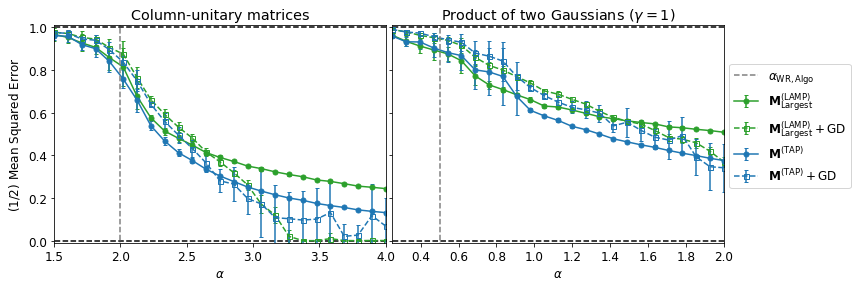

In [13]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1,2,figsize=(12,4),sharey=True)
linewidth = 1.5
markersize = 5
capsize = 2 

ax = axes[0]
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$(1/2)$ Mean Squared Error')
ax.set_title(r'Column-unitary matrices')
alpha_WR = 2.
ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
ax.plot([0.,7],[1.,1.],linestyle='--',color='black',zorder=0)
ax.plot([0.,7],[0.,0.],linestyle='--',color='black',zorder=0)
alphas_plot = alphas_more_averages[0][0]
NB_CHANNELS = 3

#Partial DFT
#Largest, LAMP 
qs = np.array([[results_more_averages[RGB_c][0][a]['q_LAMP'][0]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The means
stds = np.array([[results_more_averages[RGB_c][0][a]['q_LAMP'][1]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The stds
mses_lamp_largest_partial_dft = {'mean':np.mean(1.-qs,axis = 1)} #The mean is the mean of the means, and the std can be easily propagated
mses_lamp_largest_partial_dft['std'] = np.sqrt(np.mean(stds**2,axis=1) + np.mean(qs**2,axis=1) - np.mean(qs,axis=1)**2)
eb = ax.errorbar(alphas_plot, mses_lamp_largest_partial_dft['mean'], yerr = mses_lamp_largest_partial_dft['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$", color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#LAMP + GD
qs = np.array([[results_more_averages[RGB_c][0][a]['q_LAMP_GD'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))])
mses_lamp_GD = {'mean':np.mean(1.-qs,axis = (1,2)),'std':np.std(qs,axis = (1,2))}  #Mean and std over the 3 RGB channels and the instances
eb = ax.errorbar(alphas_plot, mses_lamp_GD['mean'], yerr = mses_lamp_GD['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}+\mathrm{GD}$", marker='s',markerfacecolor='none', color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='--o',markersize=markersize)
eb[-1][0].set_linestyle('-')

#TAP
qs = np.array([[results_more_averages[RGB_c][0][a]['q_TAP'][0]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The means
stds = np.array([[results_more_averages[RGB_c][0][a]['q_TAP'][1]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The stds
mses_tap_partial_dft = {'mean':np.mean(1.-qs,axis = 1)} #The mean is the mean of the means, and the std can be easily propagated
mses_tap_partial_dft['std'] = np.sqrt(np.mean(stds**2,axis=1) + np.mean(qs**2,axis=1) - np.mean(qs,axis=1)**2)
eb = ax.errorbar(alphas_plot, mses_tap_partial_dft['mean'], yerr = mses_tap_partial_dft['std'], label =  r"$\mathbf{M}^\mathrm{(TAP)}$", color = 'tab:blue',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#TAP + GD
qs = np.array([[results_more_averages[RGB_c][0][a]['q_TAP_GD'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))])
mses_tap_GD = {'mean':np.mean(1.-qs,axis = (1,2)),'std':np.std(qs,axis = (1,2))}  #Mean and std over the 3 RGB channels and the instances
eb = ax.errorbar(alphas_plot, mses_tap_GD['mean'], yerr = mses_tap_GD['std'], label =  r"$\mathbf{M}^\mathrm{(TAP)}+\mathrm{GD}$", color = 'tab:blue', marker='s',markerfacecolor='none',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='--o',markersize=markersize)
eb[-1][0].set_linestyle('-')

ax.set_xlim(np.min(alphas_plot),np.max(alphas_plot))
ax.set_ylim(-0.01,1.01)
ax.legend(loc='upper center', bbox_to_anchor=(2.22, 0.85),ncol=1,fancybox=True)

#Product of Gaussians
ax = axes[1]
ax.set_xlabel(r'$\alpha$')
ax.set_title(r'Product of two Gaussians ($\gamma = 1$)')
alpha_WR = 0.5
ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
ax.plot([0.,7],[1.,1.],linestyle='--',color='black',zorder=0)
ax.plot([0.,7],[0.,0.],linestyle='--',color='black',zorder=0)
alphas_plot = alphas_more_averages[0][1]

#LAMP
qs = np.array([[results_more_averages[RGB_c][1][a]['q_LAMP'][0]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The means
stds = np.array([[results_more_averages[RGB_c][1][a]['q_LAMP'][1]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The stds
mses_lamp_largest = {'mean':np.mean(1.-qs,axis = 1)} #The mean is the mean of the means, and the std can be easily propagated
mses_lamp_largest['std'] = np.sqrt(np.mean(stds**2,axis=1) + np.mean(qs**2,axis=1) - np.mean(qs,axis=1)**2)
eb = ax.errorbar(alphas_plot, mses_lamp_largest['mean'], yerr = mses_lamp_largest['std'],color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#LAMP + GD
qs = np.array([[results_more_averages[RGB_c][1][a]['q_LAMP_GD'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))])
mses_lamp_GD = {'mean':np.mean(1.-qs,axis = (1,2)),'std':np.std(qs,axis = (1,2))}  #Mean and std over the 3 RGB channels and the instances
eb = ax.errorbar(alphas_plot, mses_lamp_GD['mean'], yerr = mses_lamp_GD['std'], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}+\mathrm{GD}$", marker='s',markerfacecolor='none', color = 'tab:green', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='--o',markersize=markersize)
eb[-1][0].set_linestyle('-')

#TAP
qs = np.array([[results_more_averages[RGB_c][1][a]['q_TAP'][0]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The means
stds = np.array([[results_more_averages[RGB_c][1][a]['q_TAP'][1]['Largest'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))]) #The stds
mses_tap = {'mean':np.mean(1.-qs,axis = 1)} #The mean is the mean of the means, and the std can be easily propagated
mses_tap['std'] = np.sqrt(np.mean(stds**2,axis=1) + np.mean(qs**2,axis=1) - np.mean(qs,axis=1)**2)
eb = ax.errorbar(alphas_plot, mses_tap['mean'], yerr = mses_tap['std'],color = 'tab:blue', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
#TAP + GD
qs = np.array([[results_more_averages[RGB_c][1][a]['q_TAP_GD'] for RGB_c in range(NB_CHANNELS)] for a in range(len(alphas_plot))])
mses_tap_GD = {'mean':np.mean(1.-qs,axis = (1,2)),'std':np.std(qs,axis = (1,2))}  #Mean and std over the 3 RGB channels and the instances
eb = ax.errorbar(alphas_plot, mses_tap_GD['mean'], yerr = mses_tap_GD['std'], label =  r"$\mathbf{M}^\mathrm{(TAP)}+\mathrm{GD}$", color = 'tab:blue', marker='s',markerfacecolor='none',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='--o',markersize=markersize)
eb[-1][0].set_linestyle('-')

ax.set_xlim(np.min(alphas_plot),np.max(alphas_plot))
ax.set_ylim(-0.01,1.01)

plt.subplots_adjust(wspace=0.02)
#plt.savefig('figures/mse_real_image_with_GD.png',bbox_inches = 'tight',dpi=200)